In [2]:
import numpy as np
import scipy

from FlagRep import FlagRep, chordal_distance

from matplotlib import pyplot as plt

from sklearn.manifold import MDS
from sklearn.manifold import TSNE

In [2]:
## Small example

n=10 # n samples
p=4 # p features

# the feature hierarchy 
A1 = np.array([0])
A2 = np.array([0,1,2])
A3 = np.array([0,1,2,3])

# make a list the feature hierarchy
# this stores indices of the features
Aset = [A1, A2, A3]

# number of trials
n_trials = 1000



seed = 1
    
#set random seed
np.random.seed = seed
    
# randomly generate a data matrix
D = np.zeros((n,p))
D[:,0] = np.random.normal(0,1,n) #d_1
D[:,1] = np.random.normal(0,2,n) #d_2
D[:,2] = 2*D[:,1]                #d_3
D[:,3] = np.random.normal(0,3,n) #d_4

FlagRep(D, Aset)

(array([[ 0.29704466, -0.33498536,  0.33973265],
        [ 0.5161178 ,  0.07297053, -0.10547851],
        [ 0.02972202,  0.00775262,  0.02657481],
        [ 0.15020711, -0.26572406,  0.41906762],
        [-0.36417725,  0.29301206,  0.5401696 ],
        [ 0.04870317,  0.66515086, -0.08265951],
        [-0.37161513, -0.12519766,  0.19032945],
        [-0.42860769, -0.12996773, -0.52715556],
        [ 0.12725893,  0.50027879,  0.18095847],
        [-0.38593659, -0.02576942,  0.22727093]]),
 array([1, 2, 3]))

In [3]:
# grass pasture = 5
# corn notill = 2
# data from https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines


data = scipy.io.loadmat('../data/indian_pines/Indian_pines.mat')
labels = scipy.io.loadmat('../data/indian_pines/Indian_pines_gt.mat')

In [4]:
classes = [2,3,4,5,6,8,10,11,12,13,14,15]

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


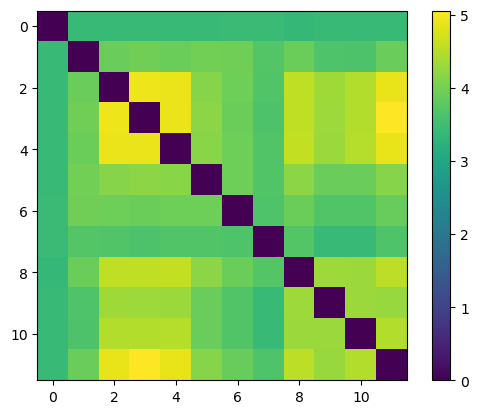

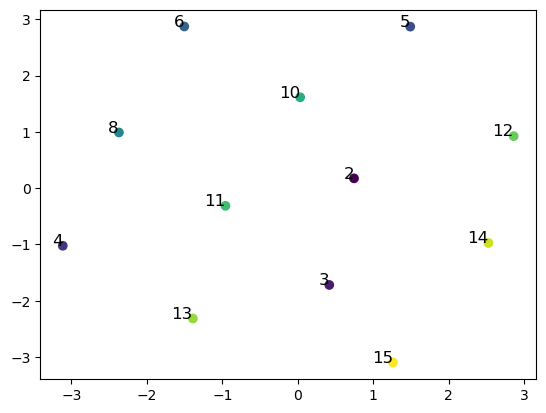

In [5]:
Aset = [np.arange(10),np.arange(30),np.arange(100)]
np.random.seed = 420

n_samples = 200

Xs = []
fl_types = []

for c in classes:
    idx = (labels['indian_pines_gt'] == c)
    sel_data = data['indian_pines'][idx]
    x = sel_data[np.random.choice(len(sel_data), size = n_samples),:]
    X, fl_type = FlagRep(x, Aset, eps_rank=1000)
    Xs.append(X)
    fl_types.append(fl_type)

p = len(fl_types)
dist_mat = np.zeros((p,p))
for i in range(p):
    for j in range(i+1,p):
        x = Xs[i]
        y = Xs[j]
        fl_type_x = fl_types[i]
        fl_type_y = fl_types[j]
        Bs_x = [np.arange(fl_type_x[0]),np.arange(fl_type_x[0]+1,fl_type_x[1])]
        Bs_y = [np.arange(fl_type_y[0]),np.arange(fl_type_y[0]+1,fl_type_y[1])]
        dist = chordal_distance(x, y, Bs_x, Bs_y)
        dist_mat[i,j] = dist
        dist_mat[j,i] = dist

plt.figure()
plt.imshow(dist_mat)
plt.colorbar()


mds = MDS(n_components=2, dissimilarity='precomputed')
vis_data = mds.fit_transform(dist_mat)

plt.figure()
plt.scatter(vis_data[:,0], vis_data[:,1],c = classes)

# Add labels to the points
for i in range(len(classes)):
    plt.text(vis_data[:,0][i], vis_data[:,1][i], classes[i], fontsize=12, ha='right')




In [6]:
fl_types

[array([ 4,  8, 32]),
 array([ 5, 10, 32]),
 array([ 5, 15, 40]),
 array([ 5, 16, 31]),
 array([ 5, 15, 26]),
 array([ 5, 11, 32]),
 array([ 5, 10, 29]),
 array([ 5,  9, 31]),
 array([ 5, 13, 40]),
 array([ 4, 12, 19]),
 array([ 4, 13, 29]),
 array([ 5, 19, 37])]

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


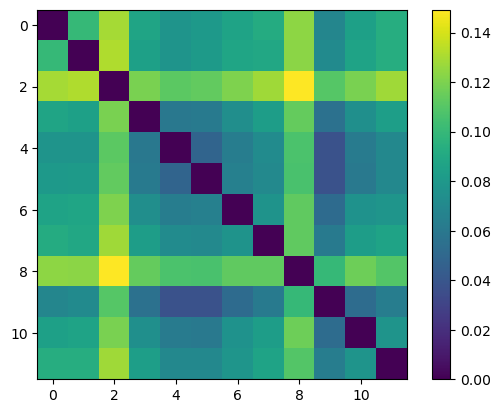

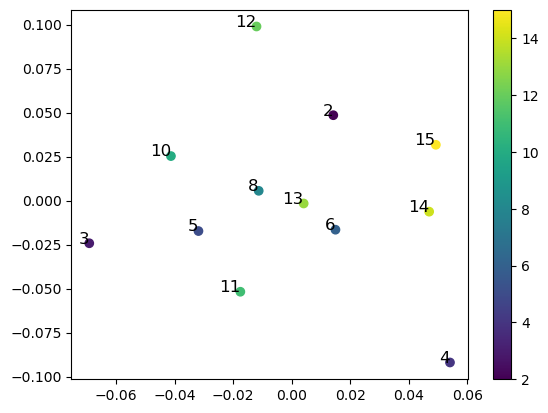

In [7]:
max_dim = np.max(np.vstack(fl_types))
fl_type = list(np.arange(1,max_dim+1))

np.random.seed = 420

n_samples = 200

Xs = []
fl_types = []

for c in classes:
    idx = (labels['indian_pines_gt'] == c)
    sel_data = data['indian_pines'][idx]
    x = sel_data[np.random.choice(len(sel_data), size = n_samples),:]
    U,_,_ = np.linalg.svd(x)
    X = U[:,:max_dim]
    Xs.append(X)
    fl_types.append(fl_type)

p = len(fl_types)
dist_mat = np.zeros((p,p))
for i in range(p):
    for j in range(i+1,p):
        x = Xs[i]
        y = Xs[j]
        fl_type_x = fl_types[i]
        fl_type_y = fl_types[j]
        Bs_x = [np.arange(fl_type_x[0]),np.arange(fl_type_x[0]+1,fl_type_x[1])]
        Bs_y = [np.arange(fl_type_y[0]),np.arange(fl_type_y[0]+1,fl_type_y[1])]
        dist = chordal_distance(x, y, Bs_x, Bs_y)
        dist_mat[i,j] = dist
        dist_mat[j,i] = dist

plt.figure()
plt.imshow(dist_mat)
plt.colorbar()


mds = MDS(n_components=2, dissimilarity='precomputed')
vis_data = mds.fit_transform(dist_mat)

plt.figure()
plt.scatter(vis_data[:,0], vis_data[:,1], c = classes)
plt.colorbar()

# Add labels to the points
for i in range(len(classes)):
    plt.text(vis_data[:,0][i], vis_data[:,1][i], classes[i], fontsize=12, ha='right')

Separate between two classes

In [53]:
# grass pasture = 5
# corn notill = 2
# data from https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines


data = scipy.io.loadmat('../data/indian_pines/Indian_pines.mat')
labels = scipy.io.loadmat('../data/indian_pines/Indian_pines_gt.mat')

In [62]:
classes = [2,3,5,6,8,10,11,12,14,15] #,8,9,10,11,12,14]
class_names = {1: 'Alfalfa',
               2: 'Corn-notill',
               3: 'Corn-mitill',
               4: 'Corn',
               5: 'Grass-pasture',
               6: 'Grass-trees',
               7: 'Grass-pasture-mowed',
               8: 'Hay-windrowed',
               9: 'Oats',
               10: 'Soybean-notill',
               11: 'Soybean-mitill',
               12: 'Soybean-clean',
               13: 'Wheat',
               14: 'Woods',
               15: 'Buildings-Grass-Trees-Drives',
               16: 'Stone-Steel-Towers'}

n_pts = 30

In [63]:
idx = labels['indian_pines_gt'] == classes[0]
print(labels['indian_pines_gt'][idx])
for c in classes[1:]:
    idx = idx + (labels['indian_pines_gt'] == c) #CHECK THIS!
    print(labels['indian_pines_gt'][idx])

[2 2 2 ... 2 2 2]
[3 3 3 ... 3 3 3]
[3 3 3 ... 3 3 3]
[3 3 3 ... 3 3 3]
[3 3 3 ... 3 3 3]
[ 3  3  3 ... 10 10 10]
[ 3  3  3 ... 10 10 10]
[ 3  3  3 ... 10 10 10]
[ 3  3  3 ... 10 10 10]
[ 3  3  3 ... 10 10 10]


In [64]:
sel_data = data['indian_pines'][idx]
sel_labels = labels['indian_pines_gt'][idx]

In [65]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# sel_data = ss.fit_transform(sel_data)

In [66]:
np.random.seed = 420

Aset = [np.arange(10),np.arange(30),np.arange(100)]

Xs = []
fl_types = []
k=100
for id in classes:
    idx = sel_labels == id
    for i in range(n_pts):
        x_sel = sel_data[idx]
        x = x_sel[np.random.choice(len(x_sel), size = k),:]
        X, fl_type = FlagRep(x,Aset, eps_rank=1300)
        Xs.append(X)
        fl_types.append(fl_type)


In [67]:
max_dim = np.max(np.vstack(fl_types))

In [68]:
p = len(fl_types)
dist_mat = np.zeros((p,p))
for i in range(p):
    for j in range(i+1,p):
        x = Xs[i]
        y = Xs[j]
        fl_type_x = fl_types[i]
        fl_type_y = fl_types[j]
        Bs_x = [np.arange(fl_type_x[0]),np.arange(fl_type_x[0]+1,fl_type_x[1])]
        Bs_y = [np.arange(fl_type_y[0]),np.arange(fl_type_y[0]+1,fl_type_y[1])]
        dist = chordal_distance(x, y, Bs_x, Bs_y)
        dist_mat[i,j] = dist
        dist_mat[j,i] = dist
        

In [69]:
fl_types

[array([ 3,  6, 19]),
 array([ 3,  5, 17]),
 array([ 3,  6, 20]),
 array([ 3,  5, 19]),
 array([ 3,  4, 17]),
 array([ 3,  6, 19]),
 array([ 3,  5, 19]),
 array([ 3,  6, 19]),
 array([ 3,  5, 18]),
 array([ 3,  6, 20]),
 array([ 3,  6, 19]),
 array([ 3,  6, 21]),
 array([ 3,  6, 18]),
 array([ 3,  6, 19]),
 array([ 3,  5, 18]),
 array([ 3,  6, 20]),
 array([ 3,  6, 21]),
 array([ 3,  6, 19]),
 array([ 3,  6, 20]),
 array([ 3,  6, 18]),
 array([ 3,  6, 20]),
 array([ 3,  7, 21]),
 array([ 3,  6, 20]),
 array([ 3,  6, 20]),
 array([ 3,  6, 19]),
 array([ 3,  6, 20]),
 array([ 3,  6, 19]),
 array([ 3,  6, 19]),
 array([ 3,  7, 21]),
 array([ 3,  5, 18]),
 array([ 3,  5, 17]),
 array([ 3,  6, 19]),
 array([ 3,  6, 19]),
 array([ 3,  5, 17]),
 array([ 3,  5, 18]),
 array([ 3,  6, 17]),
 array([ 3,  6, 19]),
 array([ 3,  5, 15]),
 array([ 3,  5, 17]),
 array([ 3,  5, 16]),
 array([ 3,  6, 17]),
 array([ 3,  5, 17]),
 array([ 3,  6, 19]),
 array([ 3,  6, 18]),
 array([ 3,  7, 20]),
 array([ 3

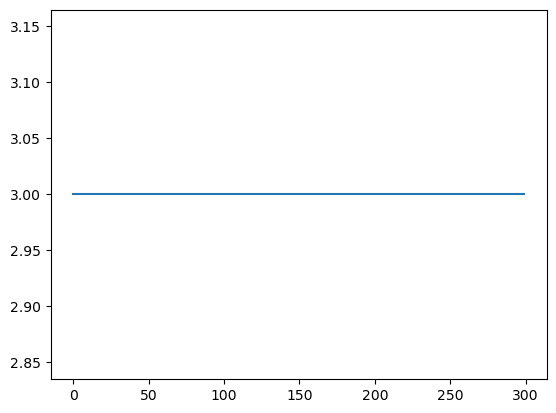

In [70]:
plt.plot([len(f) for f in fl_types])

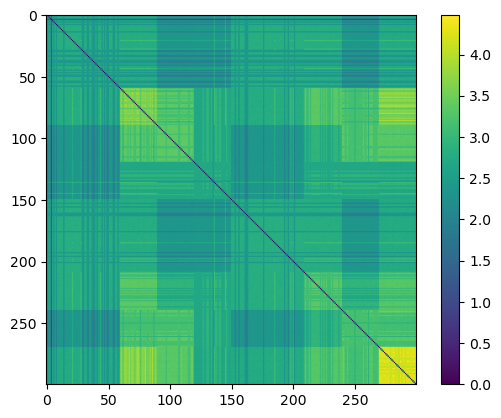

In [71]:
plt.imshow(dist_mat)
plt.colorbar()

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0, 0.5, 'MDS2')

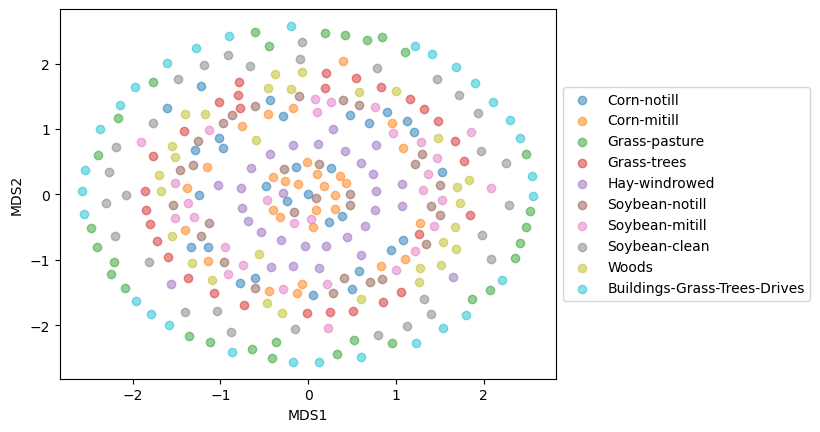

In [72]:

mds = MDS(n_components=2,dissimilarity='precomputed')
vis_data = mds.fit_transform(dist_mat)

n_classes = len(classes)
for i, c in enumerate(classes):
    plt.scatter(vis_data[i*n_pts:(i+1)*n_pts,0],vis_data[i*n_pts:(i+1)*n_pts,1], label = class_names[c], alpha=.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('MDS1')
plt.ylabel('MDS2')

Text(0, 0.5, 't-SNE2')

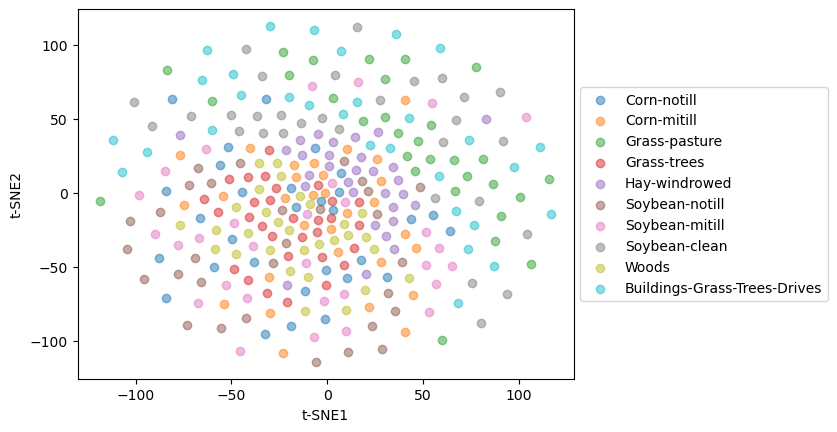

In [73]:

tsne = TSNE(n_components=2,metric='precomputed', init = "random", random_state = 10)
vis_data = tsne.fit_transform(dist_mat)

n_classes = len(classes)
for i, c in enumerate(classes):
    plt.scatter(vis_data[i*n_pts:(i+1)*n_pts,0],vis_data[i*n_pts:(i+1)*n_pts,1], label = class_names[c], alpha=.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

In [74]:
n_sing_vals = max_dim

np.random.seed = 420

Xs = []
fl_types = []
k=100
for id in classes:
    idx = sel_labels == id
    for i in range(n_pts):
        x_sel = sel_data[idx]
        x = x_sel[np.random.choice(len(x_sel), size = k),:]
        U,_,_ = np.linalg.svd(x, full_matrices=False)
        Xs.append(U[:,:n_sing_vals])
        fl_types.append(list(np.arange(1,n_sing_vals+1)))

In [75]:
p = len(fl_types)
dist_mat = np.zeros((p,p))
for i in range(p):
    for j in range(i+1,p):
        x = Xs[i]
        y = Xs[j]
        fl_type_x = fl_types[i]
        fl_type_y = fl_types[j]
        Bs_x = [np.arange(fl_type_x[0]),np.arange(fl_type_x[0]+1,fl_type_x[1])]
        Bs_y = [np.arange(fl_type_y[0]),np.arange(fl_type_y[0]+1,fl_type_y[1])]
        dist = chordal_distance(x, y, Bs_x, Bs_y)
        dist_mat[i,j] = dist
        dist_mat[j,i] = dist
        

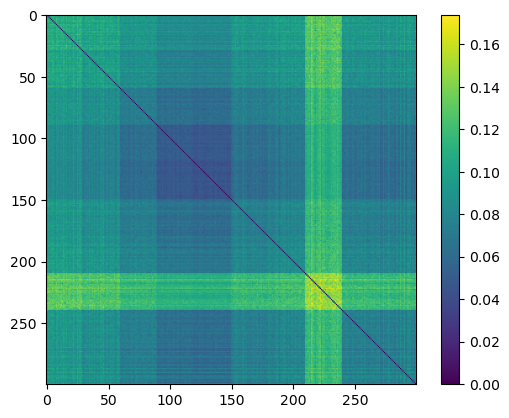

In [76]:
plt.imshow(dist_mat)
plt.colorbar()

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0, 0.5, 'MDS2')

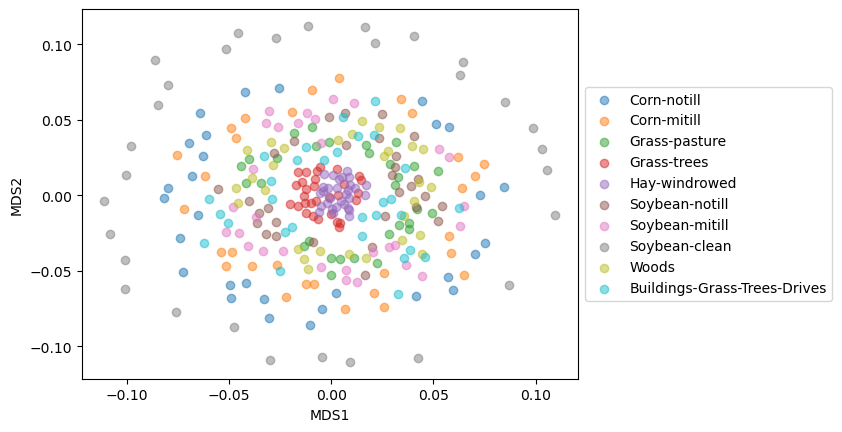

In [77]:

mds = MDS(n_components=2,dissimilarity='precomputed')
vis_data = mds.fit_transform(dist_mat)

n_classes = len(classes)
for i, c in enumerate(classes):
    plt.scatter(vis_data[i*n_pts:(i+1)*n_pts,0],vis_data[i*n_pts:(i+1)*n_pts,1], label = class_names[c], alpha=.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('MDS1')
plt.ylabel('MDS2')

Text(0, 0.5, 't-SNE2')

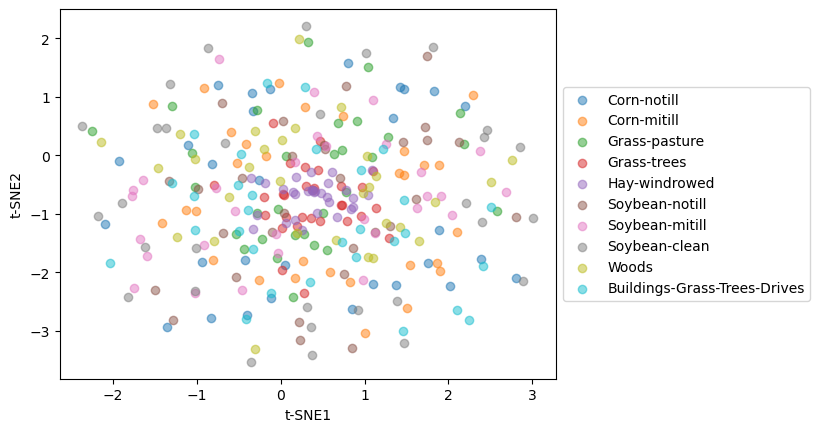

In [78]:

tsne = TSNE(n_components=2,metric='precomputed', init = "random", random_state = 10)
vis_data = tsne.fit_transform(dist_mat)

n_classes = len(classes)
for i, c in enumerate(classes):
    plt.scatter(vis_data[i*n_pts:(i+1)*n_pts,0],vis_data[i*n_pts:(i+1)*n_pts,1], label = class_names[c], alpha=.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')